In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Задание 1

In [2]:
data0= pd.read_csv('D:\ML\data\diabetes.csv')
data0=data0.astype(int)
data0.drop_duplicates()
data0['Diabetes_012'].loc[data0['Diabetes_012']==2]=1
data0.head()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0,1,1,1,40,1,0,0,0,0,...,1,0,5,18,15,1,0,9,4,3
1,0,0,0,0,25,1,0,0,1,0,...,0,1,3,0,0,0,0,7,6,1
2,0,1,1,1,28,0,0,0,0,1,...,1,1,5,30,30,1,0,9,4,8
3,0,1,0,1,27,0,0,0,1,1,...,1,0,2,0,0,0,0,11,3,6
4,0,1,1,1,24,0,0,0,1,1,...,1,0,2,3,0,0,0,11,5,4


In [3]:
data= pd.read_csv('D:\ML\data\kc_house_data.csv')
data['bathrooms']=data['bathrooms'].astype(int)
data['price']=data['price'].astype(int)
data.pop('date')
data.pop('id')
data.pop('lat')
data.pop('long')
data.pop('zipcode')
data['cherdak']=(data['floors']%1*2).astype(int)
data['floors']=data['floors'].astype(int)
data=data.drop_duplicates()
data.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15,cherdak
0,221900,3,1,1180,5650,1,0,0,3,7,1180,0,1955,0,1340,5650,0
1,538000,3,2,2570,7242,2,0,0,3,7,2170,400,1951,1991,1690,7639,0
2,180000,2,1,770,10000,1,0,0,3,6,770,0,1933,0,2720,8062,0
3,604000,4,3,1960,5000,1,0,0,5,7,1050,910,1965,0,1360,5000,0
4,510000,3,2,1680,8080,1,0,0,3,8,1680,0,1987,0,1800,7503,0


In [6]:
X=data.drop(['price'],axis=1)
Y=data['price']
X0=data0.drop(['Diabetes_012'],axis=1)
Y0=data0['Diabetes_012']

In [16]:
from sklearn.feature_selection import VarianceThreshold
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.linear_model import LinearRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report

### VarianceThreshold

In [8]:
vt = VarianceThreshold(2)
X_vt = vt.fit_transform(X)
X_vt.shape

(21607, 8)

In [9]:
vt = VarianceThreshold(1)
X0_vt = vt.fit_transform(X0)
X0_vt.shape

(253680, 6)

In [11]:
x_train,x_test,y_train,y_test= train_test_split(X_vt,Y, test_size=0.2)
x0_train,x0_test,y0_train,y0_test= train_test_split(X0_vt,Y0, test_size=0.2)

In [13]:
lr = LinearRegression().fit(x_train, y_train)

In [14]:
print(f'R^2: {lr.score(x_test, y_test)}')

R^2: 0.5237490241256084


In [18]:
gnb=GaussianNB().fit(x0_train,y0_train)

In [19]:
y0_pred = gnb.predict(x0_test)
print(classification_report(y0_test, y0_pred))

              precision    recall  f1-score   support

           0       0.88      0.89      0.88     42813
           1       0.35      0.33      0.34      7923

    accuracy                           0.80     50736
   macro avg       0.61      0.61      0.61     50736
weighted avg       0.79      0.80      0.80     50736



### SelectKBest

In [20]:
from sklearn.feature_selection import SelectKBest

In [25]:
skb = SelectKBest(k=6)
X_skb = skb.fit_transform(X,Y)
X_skb.shape

(21607, 6)

In [26]:
skb = SelectKBest(k=6)
X0_skb = skb.fit_transform(X0,Y0)
X0_skb.shape

(253680, 6)

In [28]:
x_train,x_test,y_train,y_test= train_test_split(X_skb,Y, test_size=0.2)
x0_train,x0_test,y0_train,y0_test= train_test_split(X0_skb,Y0, test_size=0.2)

In [29]:
lr = LinearRegression().fit(x_train, y_train)

In [30]:
print(f'R^2: {lr.score(x_test, y_test)}')

R^2: 0.5753860474660877


In [31]:
gnb=GaussianNB().fit(x0_train,y0_train)

In [32]:
y0_pred = gnb.predict(x0_test)
print(classification_report(y0_test, y0_pred))

              precision    recall  f1-score   support

           0       0.90      0.88      0.89     42793
           1       0.41      0.46      0.43      7943

    accuracy                           0.81     50736
   macro avg       0.66      0.67      0.66     50736
weighted avg       0.82      0.81      0.82     50736



### RFE

In [34]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

In [37]:
lr = LinearRegression().fit(X, Y)
rfe = RFE(estimator = lr, n_features_to_select=6).fit(X, Y)
X_rfe = pd.DataFrame(rfe.transform(X), columns=rfe.get_feature_names_out())

lg = LinearRegression().fit(X0, Y0)
rfe = RFE(estimator = lg, n_features_to_select=6).fit(X0, Y0)
X0_rfe = pd.DataFrame(rfe.transform(X0), columns=rfe.get_feature_names_out())

In [38]:
x_train,x_test,y_train,y_test= train_test_split(X_skb,Y, test_size=0.2)
x0_train,x0_test,y0_train,y0_test= train_test_split(X0_skb,Y0, test_size=0.2)

In [39]:
lr = LinearRegression().fit(x_train, y_train)
print(f'R^2: {lr.score(x_test, y_test)}')

R^2: 0.5824760696655349


In [40]:
gnb=GaussianNB().fit(x0_train,y0_train)
y0_pred = gnb.predict(x0_test)
print(classification_report(y0_test, y0_pred))

              precision    recall  f1-score   support

           0       0.90      0.88      0.89     42847
           1       0.41      0.45      0.43      7889

    accuracy                           0.81     50736
   macro avg       0.65      0.67      0.66     50736
weighted avg       0.82      0.81      0.82     50736



### PCA

In [41]:
from sklearn.decomposition import PCA

In [42]:
pca = PCA(n_components=5)
X_pca = pca.fit_transform(X, Y)
X_pca.shape

(21607, 5)

In [46]:
x_train,x_test,y_train,y_test= train_test_split(X_pca,Y, test_size=0.2)
x0_train,x0_test,y0_train,y0_test= train_test_split(X0_pca,Y0, test_size=0.2)

In [45]:
pca = PCA(n_components=6)
X0_pca = pca.fit_transform(X0, Y0)
X0_pca.shape

(253680, 6)

In [47]:
lr = LinearRegression().fit(x_train, y_train)
print(f'R^2: {lr.score(x_test, y_test)}')

R^2: 0.5010372232893299


In [48]:
gnb=GaussianNB().fit(x0_train,y0_train)
y0_pred = gnb.predict(x0_test)
print(classification_report(y0_test, y0_pred))

              precision    recall  f1-score   support

           0       0.87      0.91      0.89     42695
           1       0.35      0.26      0.30      8041

    accuracy                           0.81     50736
   macro avg       0.61      0.59      0.59     50736
weighted avg       0.79      0.81      0.79     50736



### TSNE

In [49]:
from sklearn.manifold import TSNE, Isomap

In [51]:
tsne = TSNE(n_components=2)
X_tsne = tsne.fit_transform(X)
X_tsne.shape

(21607, 2)

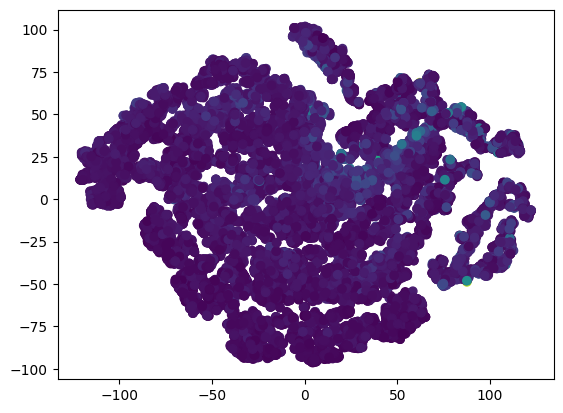

In [52]:
plt.scatter(X_tsne[:,0], X_tsne[:,1], c=Y);

In [60]:
x_train1, x_test1,y_train1,y_test1 = train_test_split(X0,Y0, test_size=0.98,stratify=Y0)

In [61]:
x_train1.shape

(5073, 21)

In [68]:
y_train1.shape

(5073,)

In [62]:
tsne = TSNE(n_components=3)
X0_tsne = tsne.fit_transform(x_train1)
X0_tsne.shape

(5073, 3)

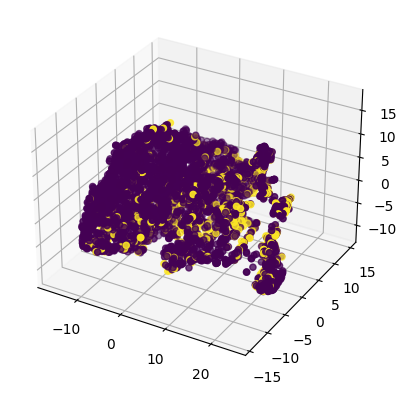

In [69]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(X0_tsne[:,0], X0_tsne[:,1], X0_tsne[:,2], c=y_train1);

In [70]:
x_train,x_test,y_train,y_test= train_test_split(X_tsne,Y, test_size=0.2)

In [71]:
lr = LinearRegression().fit(x_train, y_train)
print(f'R^2: {lr.score(x_test, y_test)}')

R^2: 0.1476633756288327


In [75]:
gnb=GaussianNB().fit(X0_tsne,y_train1)
y0_pred = gnb.predict(X0_tsne)
print(classification_report(y_train1, y0_pred))

              precision    recall  f1-score   support

           0       0.85      0.98      0.91      4274
           1       0.37      0.08      0.13       799

    accuracy                           0.83      5073
   macro avg       0.61      0.53      0.52      5073
weighted avg       0.77      0.83      0.79      5073



### Isomap

In [73]:
isomap = Isomap(n_components=2)
X_isomap = isomap.fit_transform(X)
X_isomap.shape

(21607, 2)

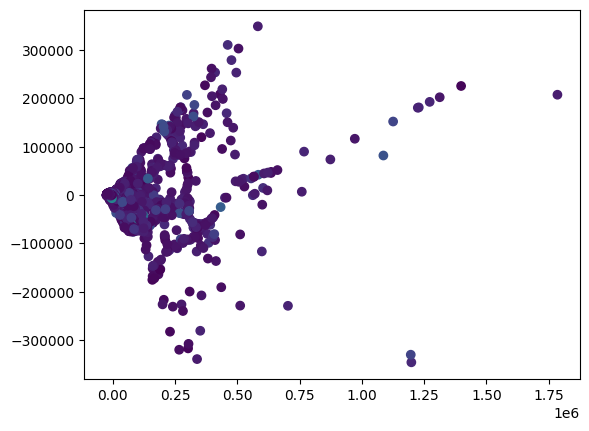

In [76]:
plt.scatter(X_isomap[:,0], X_isomap[:,1], c=Y);

In [77]:
x_train1, x_test1,y_train1,y_test1 = train_test_split(X0,Y0, test_size=0.98,stratify=Y0)

In [81]:
isomap = Isomap(n_components=3)
X0_isomap = isomap.fit_transform(x_train1)
X0_isomap.shape

(5073, 3)

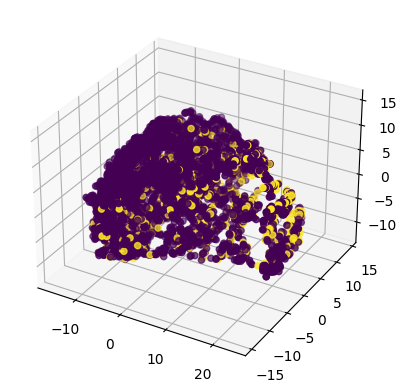

In [82]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(X0_tsne[:,0], X0_tsne[:,1], X0_tsne[:,2], c=y_train1);

In [83]:
x_train,x_test,y_train,y_test= train_test_split(X_tsne,Y, test_size=0.2)

In [84]:
lr = LinearRegression().fit(x_train, y_train)
print(f'R^2: {lr.score(x_test, y_test)}')

R^2: 0.16246369309643105


In [85]:
gnb=GaussianNB().fit(X0_isomap,y_train1)
y0_pred = gnb.predict(X0_isomap)
print(classification_report(y_train1, y0_pred))

              precision    recall  f1-score   support

           0       0.86      0.89      0.88      4274
           1       0.29      0.24      0.26       799

    accuracy                           0.79      5073
   macro avg       0.58      0.57      0.57      5073
weighted avg       0.77      0.79      0.78      5073

